In [24]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import numpy as np

In [25]:
url = "D:\\BEER_DATA\\BEER_DATA\\product_files_2007\\prod_beer.xlsx"

beer = pd.read_excel(url)

scaner_file = "D:\\BEER_DATA\\BEER_DATA\\year_2007\\beer"

scaner_file = scaner_file + "\\beer_groc_1427_1478.parquet"

scan_df = pq.read_table(scaner_file).to_pandas()

In [26]:
def twelve_pack_bottles(df,brand):
    
    num_oz = "144OZ"
    
    beer_format = ["LNBBX", "GLBBX", "LNBTL", "LNBCN"]
    
    df_brand = df[df["L5"] == brand]
    
    brand_size = df_brand.L9.str.split().str[-1]

    brand_format = df_brand.L9.str.split().str[-2]
    
    return df_brand[["L5", "UPC"]][brand_size.isin([num_oz]) & brand_format.isin(beer_format)]

In [27]:
product_list = ["BUD LIGHT", "MILLER LITE", "COORS LIGHT", "CORONA EXTRA", "HEINEKEN"]

In [28]:
beer_upcs = pd.DataFrame([])

for item in product_list:
    
    beer_upcs = beer_upcs.append(twelve_pack_bottles(beer,item))
    

In [29]:
scan_df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR
0,234212,1427,0,1,72783,200,2,17.98,NONE,0,0
1,234212,1427,0,1,18200,10985,1,6.49,NONE,0,0
2,234212,1427,0,1,18200,11981,2,12.98,NONE,0,0
3,234212,1427,0,1,18200,6992,1,6.99,NONE,0,0
4,234212,1427,0,1,18200,468,18,26.82,NONE,0,0


In [20]:
def get_beer_transactions(scan_df, upcs):
    
    brand = upcs.iloc[0,0]
    
    upcs = pd.DataFrame(upcs.UPC.str.split("-").tolist())

    upcs.columns = ["SY", "GE", "VEND", "ITEM"]

    df = scan_df[scan_df.VEND.isin(upcs.VEND) & scan_df.ITEM.isin(upcs.ITEM)].copy()
    
    df["brand"] = brand
    
    return df

In [21]:
upcs = twelve_pack_bottles(beer,"BUD LIGHT")

get_beer_transactions(df_scaner, upcs)

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,brand
7,234212,1427,0,1,18200,769,29,246.51,NONE,1,1,BUD LIGHT
221,234212,1428,0,1,18200,769,27,229.83,B,1,1,BUD LIGHT
423,234212,1429,0,1,18200,769,33,281.67,NONE,1,0,BUD LIGHT
640,234212,1430,0,1,18200,769,33,281.37,B,1,0,BUD LIGHT
850,234212,1431,0,1,18200,769,56,476.34,NONE,1,1,BUD LIGHT
1078,234212,1432,0,1,18200,769,28,238.92,NONE,1,0,BUD LIGHT
1291,234212,1433,0,1,18200,769,51,384.99,A,1,1,BUD LIGHT
1510,234212,1434,0,1,18200,769,16,135.84,A,1,1,BUD LIGHT
1730,234212,1435,0,1,18200,769,15,126.65,NONE,0,1,BUD LIGHT
1945,234212,1436,0,1,18200,769,13,104.37,NONE,0,1,BUD LIGHT


In [33]:
beer_trans = pd.DataFrame([])

for item in product_list:
    
    upcs = twelve_pack_bottles(beer,item)

    beer_trans = beer_trans.append(get_beer_transactions(df_scaner, upcs), ignore_index = True)

In [36]:
grp = beer_trans.groupby(["brand","WEEK"])

In [48]:
test = grp.agg({"UNITS": 'sum', "DOLLARS": "sum"})

test["price"] = test["DOLLARS"]/test["UNITS"]

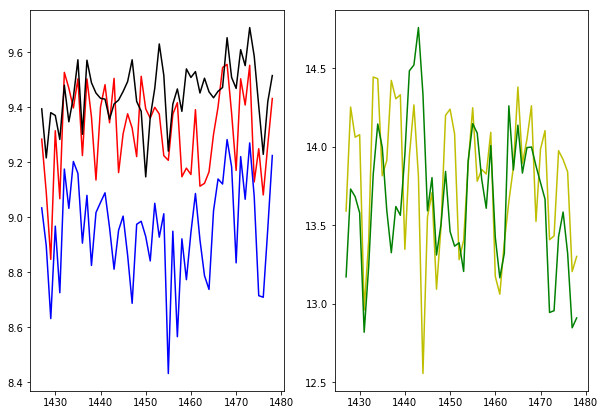

In [58]:
fig, ax = plt.subplots(1,2, figsize = (10,7))

ax[0].plot((test["price"].loc["BUD LIGHT"]), color = 'r')

ax[0].plot((test["price"].loc["COORS LIGHT"]), color = 'k')

ax[0].plot((test["price"].loc["MILLER LITE"]), color = 'b')

ax[1].plot((test["price"].loc["CORONA EXTRA"]), color = 'y')

ax[1].plot((test["price"].loc["HEINEKEN"]), color = 'g')

In [ ]:
 "CORONA EXTRA", "HEINEKEN"]